In [7]:
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
NUM_CLASSES=7

def BasicConv2D(x, filters, kernel_size, strides, padding):
    x=Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def inception_block_A(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1, filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=96,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 3x3 Conv
    branch4 = BasicConv2D(x,filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = BasicConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")
    branch4 = BasicConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_B(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')
    branch1 = BasicConv2D(x,filters=128,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv
    branch3 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=224, kernel_size=(1, 7), strides=1, padding="same")
    branch3 = BasicConv2D(branch3, filters=256, kernel_size=(7, 1), strides=1, padding="same")

    # Branch 4: 1x1 Conv -> 7x1 Conv -> 1x7 Conv -> 7x1 Conv -> 1x7 Conv
    branch4 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = BasicConv2D(branch4, filters=192, kernel_size=(1, 7), strides=1, padding="same")
    branch4 = BasicConv2D(branch4, filters=224, kernel_size=(7, 1), strides=1, padding="same")
    branch4 = BasicConv2D(branch4, filters=224, kernel_size=(1, 7), strides=1, padding="same")
    branch4 = BasicConv2D(branch4, filters=256, kernel_size=(7, 1), strides=1, padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_C(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x3 and 3x1 Conv
    branch3 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch3a = BasicConv2D(branch3, filters=256, kernel_size=(1, 3), strides=1, padding="same")
    branch3b = BasicConv2D(branch3, filters=256, kernel_size=(3, 1), strides=1, padding="same")
    branch3 = concatenate([branch3a, branch3b], axis=-1)

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 1x3 and 3x1 Conv
    branch4 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = BasicConv2D(branch4, filters=448, kernel_size=(1, 3), strides=1, padding="same")
    branch4 = BasicConv2D(branch4, filters=512, kernel_size=(3, 1), strides=1, padding="same")
    branch4a = BasicConv2D(branch4, filters=256, kernel_size=(3, 1), strides=1, padding="same")
    branch4b = BasicConv2D(branch4, filters=256, kernel_size=(1, 3), strides=1, padding="same")
    branch4 = concatenate([branch4a, branch4b], axis=-1)

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output
def reduction_A(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2, padding='valid')(x)

    # Branch 2: 3x3 Conv

    branch2 = BasicConv2D(x, filters=384,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 3x3 Conv -> 3x3 Conv

    branch3 = BasicConv2D(x, filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=224,kernel_size=(3, 3),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=256,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output
def reduction_B(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2)(x)

    # Branch 2: 1x1 Conv -> 3x3 Conv
    branch2 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=192,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=256,kernel_size=(1, 7),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(7, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output


def Stem(x):
    # Conv 3x3
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=2,padding="valid")
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=1,padding="valid")
    x = BasicConv2D(x,filters=64,kernel_size=(3, 3),strides=1,padding="same")

    # Max Pool and Conv
    branch1 = MaxPooling2D((3, 3), strides=2, padding='valid')(x)
    branch2 = BasicConv2D(x,filters=96,kernel_size=(3, 3),strides=2,padding="valid")
    x = concatenate([branch1, branch2], axis=-1)

    # Two parallel branches
    branch1 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch1 = BasicConv2D(branch1,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    branch2 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2, filters=64,kernel_size=(7, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=64,kernel_size=(1, 7),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    x = concatenate([branch1, branch2], axis=-1)
    branch1=BasicConv2D(x,filters=192,kernel_size=(3, 3),strides=2,padding="valid")
    branch2=MaxPool2D(pool_size=(3, 3),strides=2,padding="valid")(x)
    x=concatenate([branch1, branch2], axis=-1)


    return x
def inception_Model(x):
    x=Stem(x)
    for i in range(4):
        x=inception_block_A(x)
    x=reduction_A(x)
    for i in range(7):
        x=inception_block_B(x)
    x=reduction_B(x)
    for i in range(3):
        x=inception_block_C(x)
    x = AveragePooling2D(pool_size=(5,5))(x)
    x = Dropout(0.2)(x)
    x= Flatten()(x)
    x= Dense(NUM_CLASSES, activation='softmax')(x)
    return x

In [8]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extracting data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [9]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


def evaluate_model(model, data_path, target_size=(299, 299), batch_size=128):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    dataset = datagen.flow_from_directory(
        data_path,
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False
    )

    Y_pred = model.predict(dataset)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = dataset.classes
    class_labels = list(dataset.class_indices.keys())

    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    class_report = classification_report(y_true, y_pred, target_names=class_labels)
    print('Classification Report:')
    print(class_report)

    n_classes = Y_pred.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i, label in enumerate(class_labels):
        plt.plot(fpr[i], tpr[i], lw=2, label='{} (area = {:.2f})'.format(label, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_normalized, annot=conf_matrix, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix Heatmap')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [10]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # Added shear transformation
    zoom_range=0.2,   # Added zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=32
)

validation_dataset = valid_datagen.flow_from_directory(
    'HAM10000/val',
    target_size=(299, 299),
    batch_size=128
)

Found 8013 images belonging to 7 classes.
Found 1001 images belonging to 7 classes.


In [11]:
import tensorflow as tf


from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Load data
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=inception_Model(inputs)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_149 (Conv2D)            (None, 149, 149, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_149 (Batch  (None, 149, 149, 32  128        ['conv2d_149[0][0]']             
 Normalization)                 )                                                           

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
251/251 [==============================] - 63s 225ms/step - loss: 0.9481 - accuracy: 0.6717 - val_loss: 1.5668 - val_accuracy: 0.4036
Epoch 2/50
251/251 [==============================] - 53s 211ms/step - loss: 0.8531 - accuracy: 0.6883 - val_loss: 1.1716 - val_accuracy: 0.5684
Epoch 3/50
251/251 [==============================] - 54s 213ms/step - loss: 0.8126 - accuracy: 0.7007 - val_loss: 0.8717 - val_accuracy: 0.6883
Epoch 4/50
251/251 [==============================] - 53s 209ms/step - loss: 0.7849 - accuracy: 0.7130 - val_loss: 1.0674 - val_accuracy: 0.6793
Epoch 5/50
251/251 [==============================] - 55s 217ms/step - loss: 0.7744 - accuracy: 0.7122 - val_loss: 0.9654 - val_accuracy: 0.6753
Epoch 6/50
251/251 [==============================] - 53s 209ms/step - loss: 0.7505 - accuracy: 0.7222 - val_loss: 0.9439 - val_accuracy: 0.6953
Epoch 7/50
251/251 [==============================] - 51s 202ms/step - loss: 0.7325 - accuracy: 0.7297 - val_loss: 0.8435 - val_ac

In [13]:
model.save("Inception_model.h5")

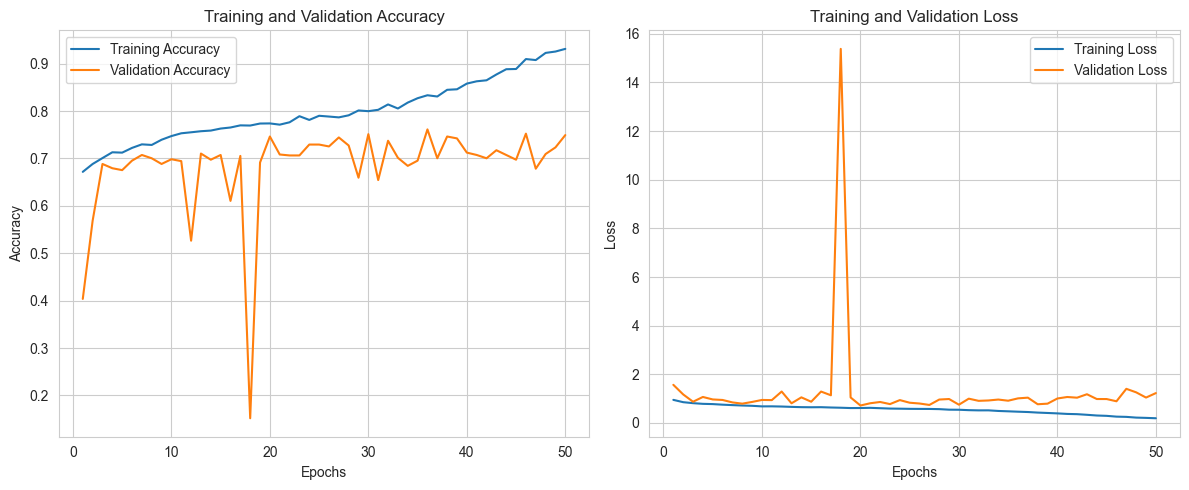

In [14]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 409ms/step
Confusion Matrix:
[[  6   4   7   4   4   7   0]
 [  7  10  10   3   2  19   1]
 [  1   0  44   1   8  56   0]
 [  1   0   2   3   1   4   0]
 [  0   0  18   0  45  48   1]
 [  1   1  22   1  16 629   0]
 [  0   0   0   0   0   4  10]]
Classification Report:
              precision    recall  f1-score   support

       akiec       0.38      0.19      0.25        32
         bcc       0.67      0.19      0.30        52
         bkl       0.43      0.40      0.41       110
          df       0.25      0.27      0.26        11
         mel       0.59      0.40      0.48       112
          nv       0.82      0.94      0.88       670
        vasc       0.83      0.71      0.77        14

    accuracy                           0.75      1001
   macro avg       0.57      0.44      0.48      1001
weighted avg       0.72      0.75      0.72      1001



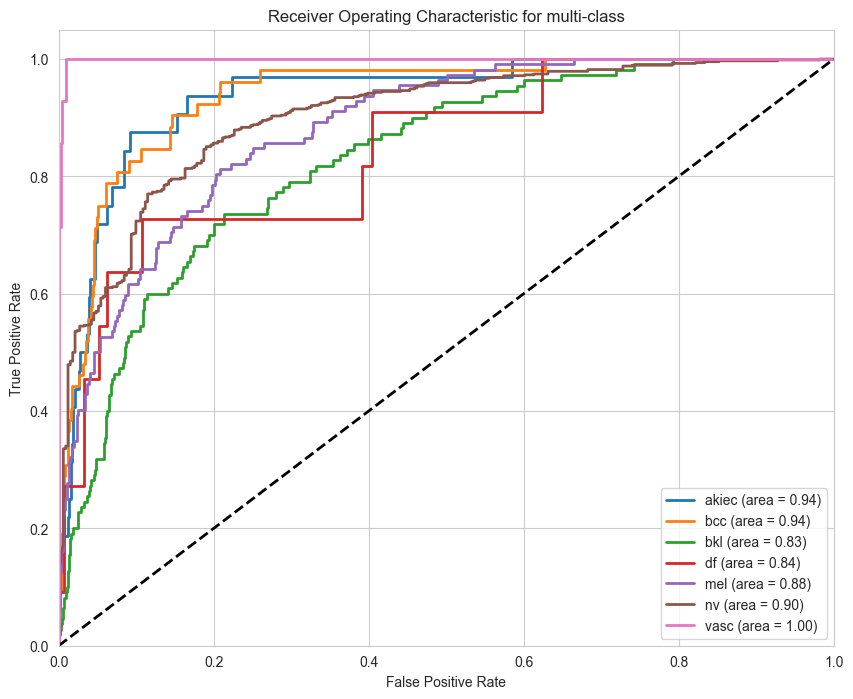

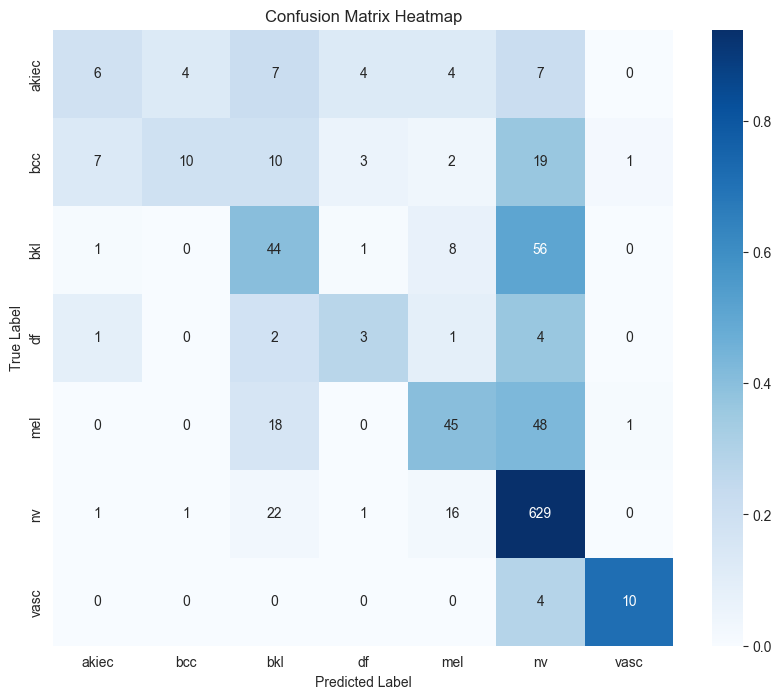

In [15]:
evaluate_model(model, 'HAM10000/test')

In [10]:
from tensorflow.keras.applications import Xception
base_model = Xception(weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
251/251 [==============================] - 43s 162ms/step - loss: 0.9884 - accuracy: 0.6639 - val_loss: 1.6472 - val_accuracy: 0.6693
Epoch 2/50
251/251 [==============================] - 41s 161ms/step - loss: 0.8471 - accuracy: 0.6946 - val_loss: 0.9035 - val_accuracy: 0.6983
Epoch 3/50
251/251 [==============================] - 41s 162ms/step - loss: 0.7985 - accuracy: 0.7044 - val_loss: 1.1662 - val_accuracy: 0.6823
Epoch 4/50
251/251 [==============================] - 40s 161ms/step - loss: 0.7684 - accuracy: 0.7208 - val_loss: 1.0137 - val_accuracy: 0.6553
Epoch 5/50
251/251 [==============================] - 39s 157ms/step - loss: 0.7624 - accuracy: 0.7215 - val_loss: 0.9577 - val_accuracy: 0.6204
Epoch 6/50
251/251 [==============================] - 39s 156ms/step - loss: 0.7375 - accuracy: 0.7271 - val_loss: 0.9434 - val_accuracy: 0.6474
Epoch 7/50
251/251 [==============================] - 39s 157ms/step - loss: 0.7226 - accuracy: 0.7309 - val_loss: 1.0394 - val_ac

In [12]:
model.save("Depthwise_Separable_model.h5")

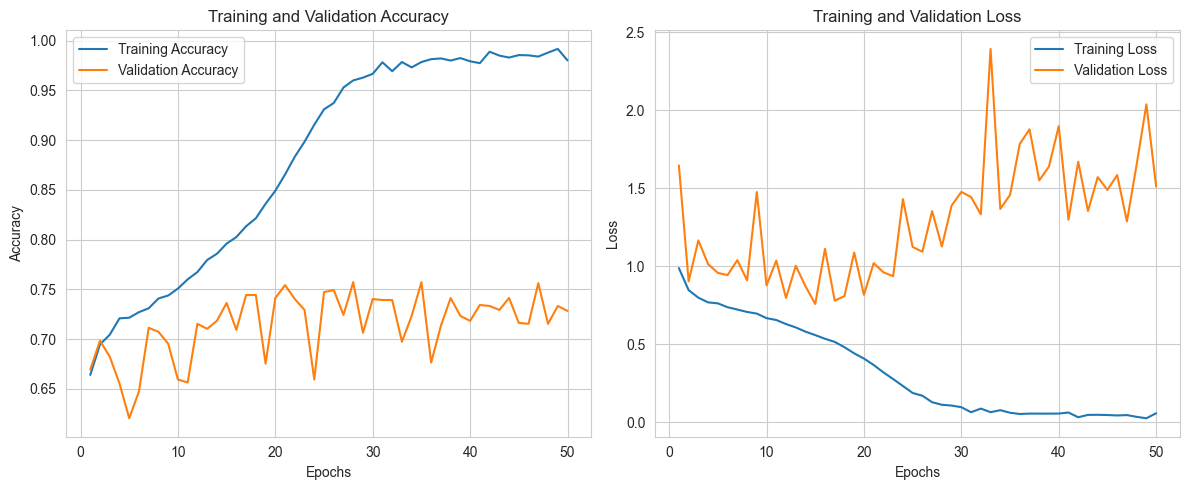

In [13]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 3s 397ms/step
Confusion Matrix:
[[  5  18   7   2   0   0   0]
 [  0  38   3   4   1   5   1]
 [  4  13  50   2   5  36   0]
 [  0   3   0   5   0   3   0]
 [  4  14  19   1  31  40   3]
 [  2  23  18   5  15 606   1]
 [  0   1   0   0   0   1  12]]
Classification Report:
              precision    recall  f1-score   support

       akiec       0.33      0.16      0.21        32
         bcc       0.35      0.73      0.47        52
         bkl       0.52      0.45      0.48       110
          df       0.26      0.45      0.33        11
         mel       0.60      0.28      0.38       112
          nv       0.88      0.90      0.89       670
        vasc       0.71      0.86      0.77        14

    accuracy                           0.75      1001
   macro avg       0.52      0.55      0.51      1001
weighted avg       0.75      0.75      0.74      1001



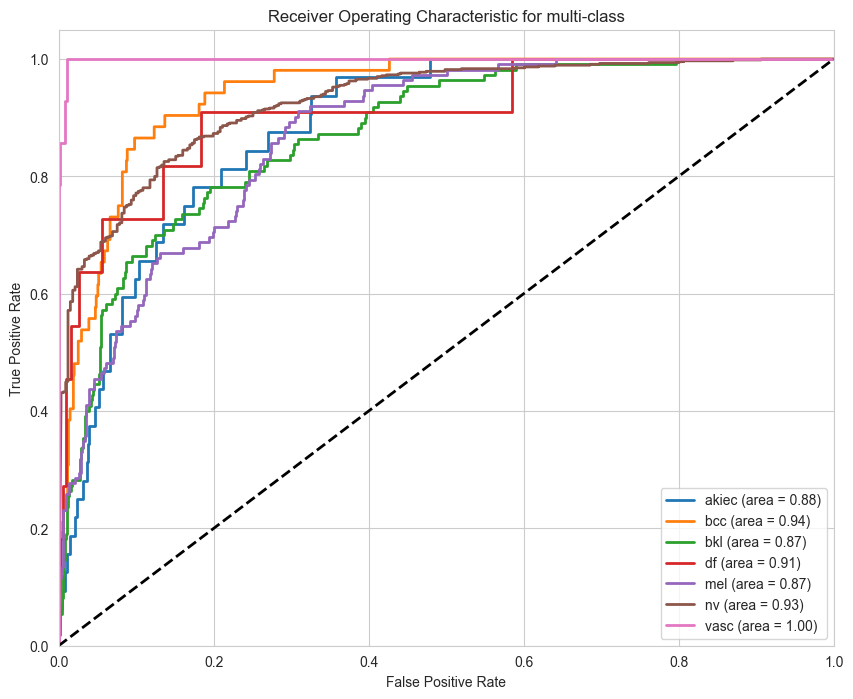

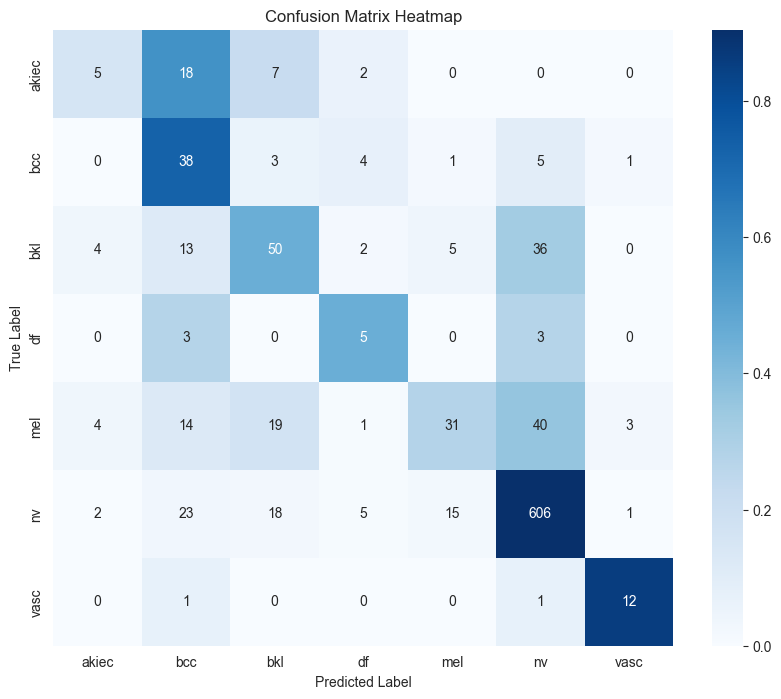

In [14]:
evaluate_model(model, 'HAM10000/test')